# Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


# 6.1 kernels in SVM

## Linear Kernel
It is the most basic type of kernel, usually one dimensional in nature. It proves to be the best function when there are lots of features. The linear kernel is mostly preferred for linear problems.

Linear kernel functions are faster than other functions. 

* Linear Kernel Formula

$$F(x, xj) = sum( x.xj)$$

Here, x, xj represents the data you’re trying to classify.

## Polynomial Kernel 
It is a more generalized representation of the linear kernel. It is not as preferred as other kernel functions as it is less efficient and accurate.

* Polynomial Kernel Formula
$$F(x, xj) = (x.xj+1)^d$$

Here ‘.’ shows the dot product of both the values, and d denotes the degree. 

$F(x, xj)$ representing the decision boundary to separate the given classes. 

## Gaussian Radial Basis Function (RBF) 
 It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.

* Gaussian Radial Basis Formula
$$F(x, xj) = exp(-\gamma * ||x - xj||^2)$$

The value of gamma varies from 0 to 1. You have to manually provide the value of gamma in the code. The most preferred value for gamma is 0.1.

## Sigmoid Kernel
 It is mostly preferred for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons.

It can be shown as,

* Sigmoid Kenel Function
$$F(x, xj) = tanh(αxay + c)$$

## Gaussian Kernel
It is a commonly used kernel. It is used when there is no prior knowledge of a given dataset.

# 6.2
## Loading Dataset

In [48]:
iris              = datasets.load_iris()
class_names       = iris.target_names  
iris_df           = pd.DataFrame(iris.data, columns=iris.feature_names)  
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Visualize Dataset

In [49]:
iris_df = iris_df[['petal length (cm)', 'petal width (cm)', 'target']]
iris_df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [52]:
X = iris_df[['petal length (cm)', 'petal width (cm)']]
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

C:\Users\user\AppData\Local\Temp\ipykernel_11852\2853679559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['target_cat'] = iris_df['target']
C:\Users\user\AppData\Local\Temp\ipykernel_11852\2853679559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['target_cat'].replace({0:'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)


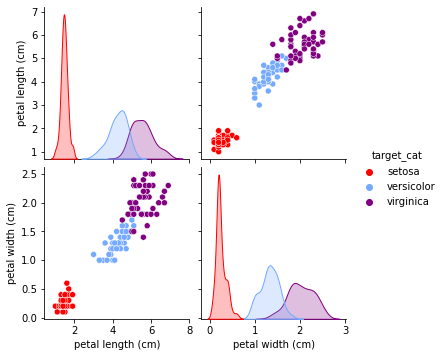

In [54]:
iris_df['target_cat'] = iris_df['target']
iris_df['target_cat'].replace({0:'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)
palette = {'setosa': 'red', 'versicolor': '#75AAFF', 'virginica': 'purple'}
g = sns.pairplot(iris_df, vars = iris_df.columns[0:2], hue="target_cat", palette=palette)

## Fitting SVM Models 

In [40]:

def plotSVC(svm_model,title):
    # create a mesh to plot in
    x_min, x_max = X_train['petal length (cm)'].min() - 1, X_train['petal length (cm)'].max() + 1
    y_min, y_max = X_train[ 'petal width (cm)'].min() - 1, X_train[ 'petal width (cm)'].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.Reds, alpha=0.8)
    plt.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, cmap=plt.cm.Blues_r)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()
    pass

def plotConfusionMatrix(confmatrix, title, color):
    plt.figure(figsize=(8,8))
    ax = sns.heatmap(confmatrix, annot=True, cmap=color)
    ax.set_title(title+' Confusion Matrix\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['1','2','3'])
    ax.yaxis.set_ticklabels(['1','2','3'])
    plt.show()


### SVM with Linear Kernel, one-vs-rest

Train Accuracy :  0.9833333333333333 
Test Accuracy :  0.9


c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


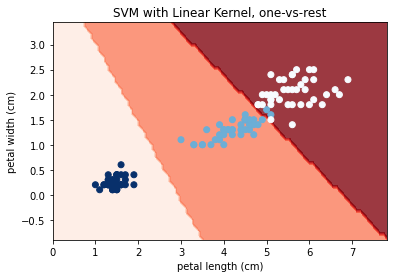

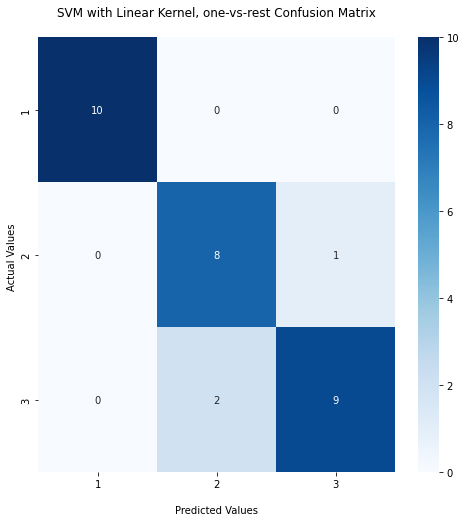

In [41]:
#plt.figure(figsize=(10,10))
linSvmOVR= SVC(kernel='linear', decision_function_shape='ovr', C = 2)
linSvmOVR= linSvmOVR.fit(X_train,y_train)
print("Train Accuracy : ",linSvmOVR.score(X_train, y_train), "\nTest Accuracy : ",linSvmOVR.score(X_test, y_test))
linSvmOVR.score(X_train, y_train), linSvmOVR.score(X_test, y_test)
plotSVC(svm_model = linSvmOVR,title = "SVM with Linear Kernel, one-vs-rest")
linSvmOVRPred = linSvmOVR.predict(X_test)
confMatrix = confusion_matrix(y_test, linSvmOVRPred)
plotConfusionMatrix(confMatrix,"SVM with Linear Kernel, one-vs-rest", "Blues")

### SVM with Linear Kernel, one-vs-one

Train Accuracy :  0.9833333333333333 
Test Accuracy :  0.9333333333333333


c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


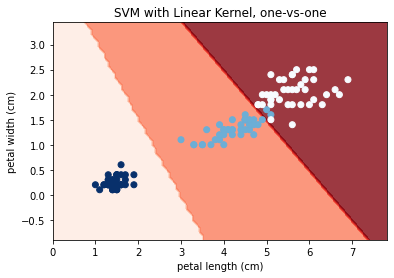

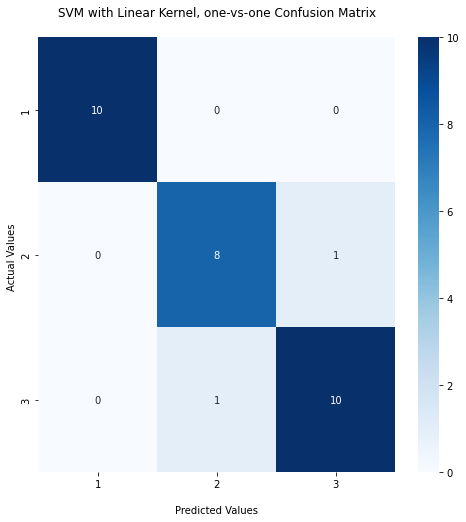

In [42]:
linSvmOVO= SVC(kernel='linear', decision_function_shape='ovo')
linSvmOVO= linSvmOVO.fit(X_train,y_train)
print("Train Accuracy : ",linSvmOVO.score(X_train, y_train), "\nTest Accuracy : ",linSvmOVO.score(X_test, y_test))
plotSVC(svm_model = linSvmOVO,title = "SVM with Linear Kernel, one-vs-one")
linSvmOVOPred = linSvmOVO.predict(X_test)
confMatrix = confusion_matrix(y_test, linSvmOVOPred)
plotConfusionMatrix(confMatrix,"SVM with Linear Kernel, one-vs-one", "Blues")

### SVM with RBF Kernel, one-vs-rest

Train Accuracy :  0.9583333333333334 
Test Accuracy :  0.9333333333333333


c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


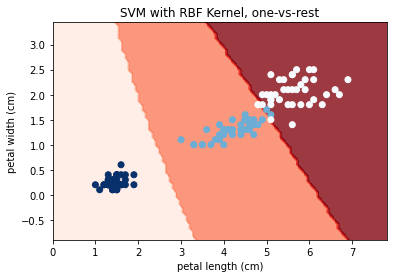

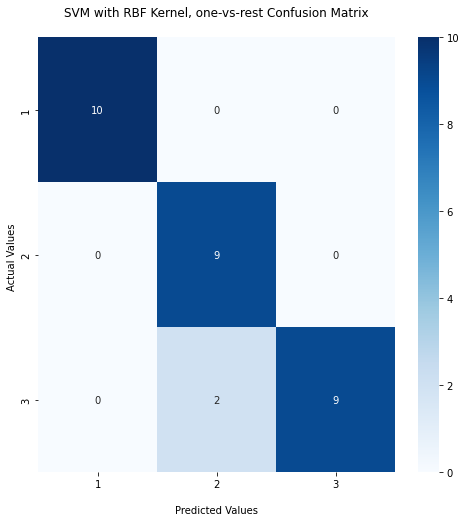

In [43]:
rbfSvmOVR = SVC(kernel='rbf',gamma = "scale", decision_function_shape='ovr')
rbfSvmOVR = rbfSvmOVR.fit(X_train,y_train)
print("Train Accuracy : ",rbfSvmOVR.score(X_train, y_train), "\nTest Accuracy : ",rbfSvmOVR.score(X_test, y_test))
rbfSvmOVR.score(X_train, y_train), rbfSvmOVR.score(X_test, y_test)
plotSVC(svm_model = rbfSvmOVR,title = "SVM with RBF Kernel, one-vs-rest")
rbfSvmOVRPred = rbfSvmOVR.predict(X_test)
confMatrix = confusion_matrix(y_test, rbfSvmOVRPred)
plotConfusionMatrix(confMatrix,"SVM with RBF Kernel, one-vs-rest", "Blues")

### SVM with Polynomial Kernel (d=5), one-vs-rest

Train Accuracy :  0.975 
Test Accuracy :  0.9


c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


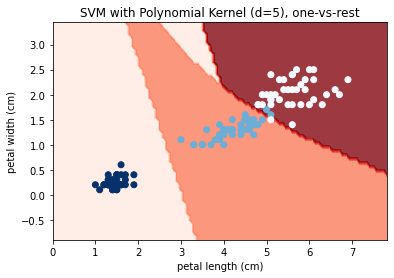

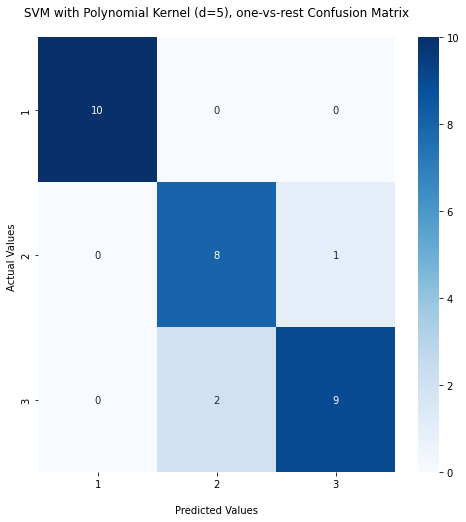

In [44]:
polySvmOVR = SVC( kernel='poly',degree=5, decision_function_shape='ovr')
polySvmOVR = polySvmOVR.fit(X_train,y_train)
print("Train Accuracy : ",polySvmOVR.score(X_train, y_train),  "\nTest Accuracy : ",polySvmOVR.score(X_test, y_test))
polySvmOVR.score(X_train, y_train), polySvmOVR.score(X_test, y_test)
plotSVC(svm_model = polySvmOVR,title = "SVM with Polynomial Kernel (d=5), one-vs-rest")
polySvmOVRPred = polySvmOVR.predict(X_test)
confMatrix = confusion_matrix(y_test, polySvmOVRPred)
plotConfusionMatrix(confMatrix,"SVM with Polynomial Kernel (d=5), one-vs-rest", "Blues")

## Compare Models

* As we saw, data points are linearly separable, and this is the reason why the **Linear** Support Vector Machine (SVM) works well on this dataset.
* The **Polynomial** model also classifies the data points accurately, but usually, it's not efficient.
* The **Gaussian** kernel has the best result on test data. If we choose "scale" for gamma parameters, the overfitting of the model will decrease.

In the following block, we've shown how the gamma parameter can influence the training process. If we put gamma = 100, overfitting occurs on training samples. If we put gamma = 10, overfitting reduces.

### SVM with RBF Kernel, one-vs-rest & gamma = 100

Train Accuracy :  1.0 
Test Accuracy :  0.9


c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


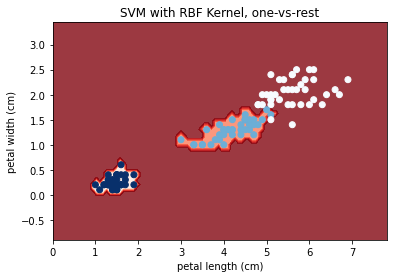

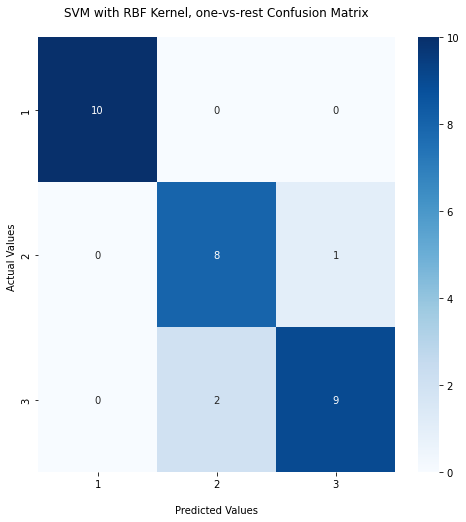

In [45]:
rbfSvmOVR = SVC(kernel='rbf',gamma = 100, decision_function_shape='ovr')
rbfSvmOVR = rbfSvmOVR.fit(X_train,y_train)
print("Train Accuracy : ",rbfSvmOVR.score(X_train, y_train), "\nTest Accuracy : ",rbfSvmOVR.score(X_test, y_test))
rbfSvmOVR.score(X_train, y_train), rbfSvmOVR.score(X_test, y_test)
plotSVC(svm_model = rbfSvmOVR,title = "SVM with RBF Kernel, one-vs-rest")
rbfSvmOVRPred = rbfSvmOVR.predict(X_test)
confMatrix = confusion_matrix(y_test, rbfSvmOVRPred)
plotConfusionMatrix(confMatrix,"SVM with RBF Kernel, one-vs-rest", "Blues")

### SVM with RBF Kernel, one-vs-rest & gamma = 10

Train Accuracy :  0.9833333333333333 
Test Accuracy :  0.9


c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


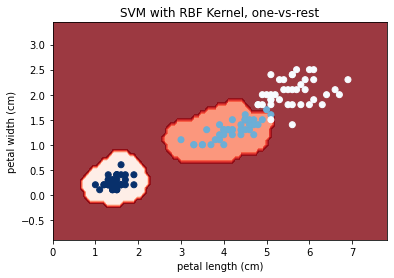

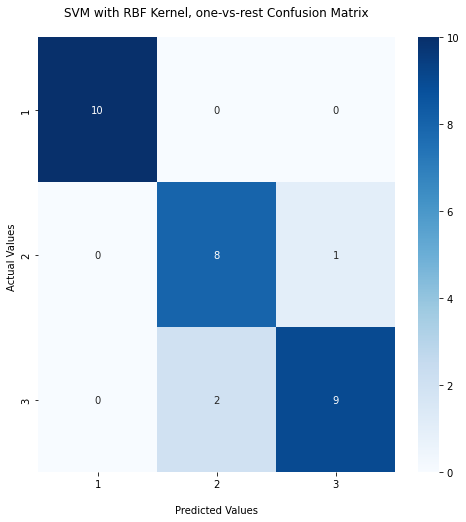

In [46]:
rbfSvmOVR = SVC(kernel='rbf',gamma = 10, decision_function_shape='ovr')
rbfSvmOVR = rbfSvmOVR.fit(X_train,y_train)
print("Train Accuracy : ",rbfSvmOVR.score(X_train, y_train), "\nTest Accuracy : ",rbfSvmOVR.score(X_test, y_test))
rbfSvmOVR.score(X_train, y_train), rbfSvmOVR.score(X_test, y_test)
plotSVC(svm_model = rbfSvmOVR,title = "SVM with RBF Kernel, one-vs-rest")
rbfSvmOVRPred = rbfSvmOVR.predict(X_test)
confMatrix = confusion_matrix(y_test, rbfSvmOVRPred)
plotConfusionMatrix(confMatrix,"SVM with RBF Kernel, one-vs-rest", "Blues")